# Тестовое задание по анализу данных

Имеется набор данных. Необходимо проанализировать его и представить ответы на вопросы с визуализацией каждого пункта.

Ссылка: https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/edit?usp=sharing

Ссылка для загрузки: https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv


## imports

In [1]:
!pip install ydata_profiling

In [2]:
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

from ydata_profiling import ProfileReport

## Загрузка данных и предобработка данных

In [3]:
df = pd.read_csv('https://docs.google.com/spreadsheets/d/1DkdhWMrVjtflQfmCIKl8hCjSlIxph1L42_fgyFo0QPs/export?format=csv')
df

,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,30/12/2018,Стандарт,Урал,Appliances,"37229,08"
1,907,30/12/2018,Стандарт,Владивосток,Bookcases,"20994,61"
2,908,30/12/2018,Стандарт,Владивосток,Phones,"42133,86"
3,909,30/12/2018,Стандарт,Владивосток,Binders,10612
4,1297,30/12/2018,Стандарт,Калиниград,Binders,"28781,13"
...,...,...,...,...,...,...
9795,1760,05/01/2015,Стандарт,Владивосток,Art,"8639,472"
9796,740,04/01/2015,Стандарт,Урал,Labels,"15246,05"
9797,741,04/01/2015,Стандарт,Урал,Storage,"20415,81"
9798,742,04/01/2015,Стандарт,Урал,Binders,"4559,085"


In [4]:
df.dtypes

,0
ID,int64
Order Date,object
Class,object
Region,object
Sub-Category,object
Sales,object


In [5]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d/%m/%Y")
df['Sales'] = df['Sales'].replace(to_replace=',', value='.', regex=True).astype('float')

print(df.dtypes)
df

ID                       int64
Order Date      datetime64[ns]
Class                   object
Region                  object
Sub-Category            object
Sales                  float64
dtype: object


,ID,Order Date,Class,Region,Sub-Category,Sales
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130
...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085


## EDA

In [6]:
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Нет пропусков, нет дубликатов. 4 типа класса доставки, 4 региона доставки, 17 подкатегорий товаров.

## задание 1

### а) Какие подгруппы товаров наиболее часто покупают за все время продаж (минимум 4 группы)?

In [7]:
counts = df['Sub-Category'].value_counts().nlargest(4)
freqs = df['Sub-Category'].value_counts(normalize=True).nlargest(4) * 100

pd.DataFrame({'Count': counts, 'Frequency': freqs}).reset_index()

,Sub-Category,Count,Frequency
0,Binders,1492,15.224490
1,Paper,1338,13.653061
2,Furnishings,931,9.500000
3,Phones,876,8.938776


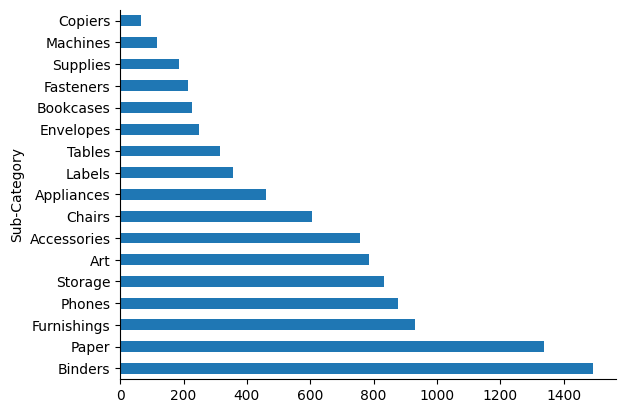

In [8]:
df.groupby('Sub-Category').size().sort_values(ascending=False).plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### б) Какие подгруппы товаров наиболее часто покупают за последние два года (минимум 4 группы)?

In [9]:
df['Order Date'].dt.year.unique()

array([2018, 2017, 2016, 2015], dtype=int32)

In [10]:
counts = df[df['Order Date'].dt.year >= 2017]['Sub-Category'].value_counts().nlargest(4)
freqs = df[df['Order Date'].dt.year >= 2017]['Sub-Category'].value_counts(normalize=True).nlargest(4) * 100

pd.DataFrame({'Count': counts, 'Frequency': freqs}).reset_index()

,Sub-Category,Count,Frequency
0,Binders,900,15.538674
1,Paper,809,13.967541
2,Furnishings,557,9.616713
3,Phones,510,8.805249


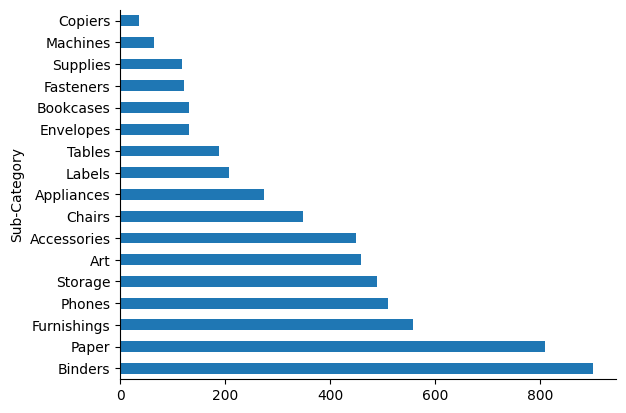

In [11]:
df[df['Order Date'].dt.year >= 2017].groupby('Sub-Category').size().sort_values(ascending=False).plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### в) Какие подгруппы товаров наиболее часто покупают за последний год(минимум 4 группы)?

In [12]:
counts = df[df['Order Date'].dt.year >= 2018]['Sub-Category'].value_counts().nlargest(4)
freqs = df[df['Order Date'].dt.year >= 2018]['Sub-Category'].value_counts(normalize=True).nlargest(4) * 100

pd.DataFrame({'Count': counts, 'Frequency': freqs}).reset_index()

,Sub-Category,Count,Frequency
0,Binders,492,15.101289
1,Paper,452,13.873542
2,Furnishings,310,9.515040
3,Phones,290,8.901166


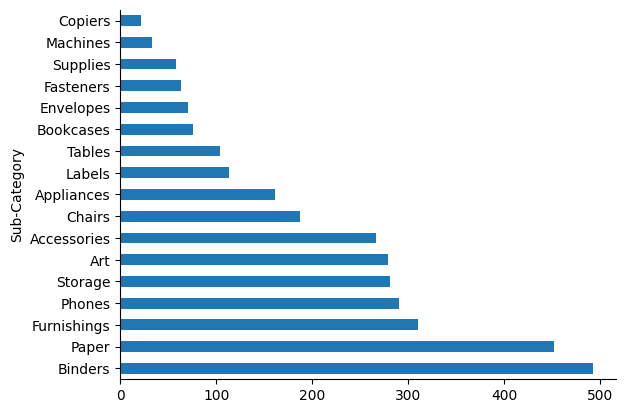

In [13]:
df[df['Order Date'].dt.year >= 2018].groupby('Sub-Category').size().sort_values(ascending=False).plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

### Вывод

4 наиболее часто заказываемые категории и их порядок относительно друг друга за последние 1 год / 2 года / все время продаж остаются неизменными. По убыванию частоты:  
1) Blinders  
2) Paper  
3) Furnishings  
4) Phones  

## задание 2

Построить boxplot («Ящик с усами») на основе продаж (Sales). Найти мажоритарную черту (т.е. избавиться от аномалий и представить четкую картину распределения величин).
 Можно использовать правило трех сигм. Однако любые другие решения приветствуются.


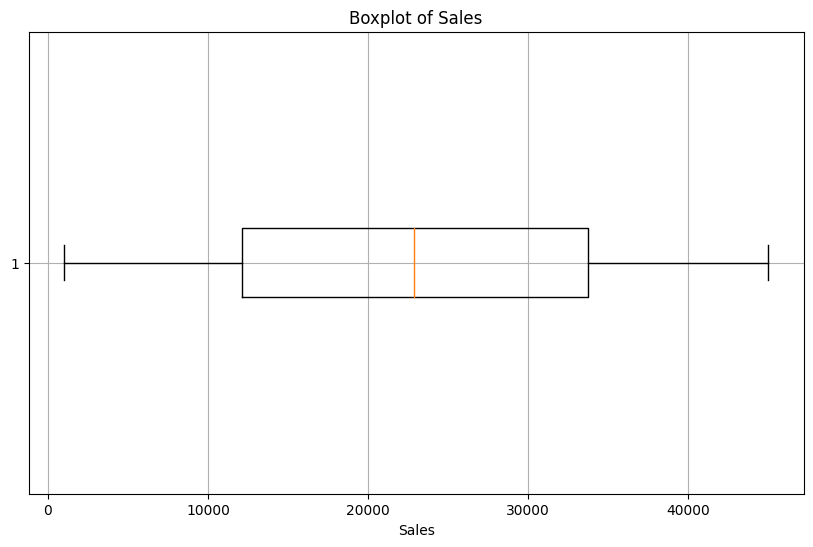

In [14]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Sales'], vert=False)
plt.title('Boxplot of Sales')
plt.xlabel('Sales')
plt.grid(True)
plt.show();

<Axes: >

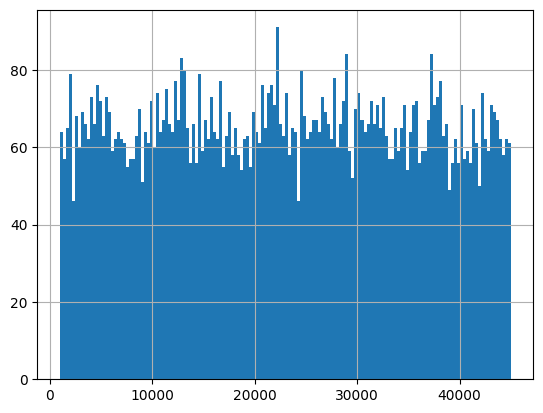

In [15]:
df['Sales'].hist(bins=150)

Распределение цен далеко от нормального, поэтому правило 3 сигм здесь не очень подойдет. Согласно box-plot'у выше, на основе интерквартального размаха выбросов по цене в данных нет. Тем не менее, отфильтруем по данные по IQR:

In [16]:
def filter_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[column] >= Q1 - 1.5 * IQR) & (df[column] <= Q3 + 1.5 * IQR)]


filtered_df = filter_iqr(df, 'Sales')

print('Размер исходного и отфильтрованного датасетов равны: ', df.shape == filtered_df.shape)

Размер исходного и отфильтрованного датасетов равны:  True


### задание 3

Для этого задания необходимо разбить все покупки на энное количество групп “Sale_group” (Допустим маленькие продажи, средние и высокие) на основе Sales.  
Сгруппировать данные на основе региона и группы продаж (Region, Sale_group). Определить основные тенденции и паттерны. Выделить наиболее «прибыльную» группу.


Что выбрать в качестве Sale_group?  
Если обязательно нужно выбрать группы на основе атрибута Sales, то действительно можно посмотреть, какой ценовой сегмент заказов наиболее прибылен. Здесь Sales разобьем на Low, Mid, High 25-м и 75-м перцентилем.

Также можно выбрать год заказа. Из разведочного анализа видно, что число продаж растет из года в год. Так можно будет оценить, растет ли число заказов в каждом регионе, или преобладают лишь некоторые.
Еще можно будет увидеть растет ли вместе с ежегодным числом заказов сумма продаж.

### если группировать нужно именно на основе Sales

In [17]:
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
print(f"Q1 = {Q1}; Q3 = {Q3}")

def categorize_sales(value):
    if value <= Q1:
        return 'Low'
    elif value <= Q3:
        return 'Mid'
    else:
        return 'High'

df['Sale_group'] = df['Sales'].apply(categorize_sales)
df

Q1 = 12135.625; Q3 = 33730.13


,ID,Order Date,Class,Region,Sub-Category,Sales,Sale_group
0,646,2018-12-30,Стандарт,Урал,Appliances,37229.080,High
1,907,2018-12-30,Стандарт,Владивосток,Bookcases,20994.610,Mid
2,908,2018-12-30,Стандарт,Владивосток,Phones,42133.860,High
3,909,2018-12-30,Стандарт,Владивосток,Binders,10612.000,Low
4,1297,2018-12-30,Стандарт,Калиниград,Binders,28781.130,Mid
...,...,...,...,...,...,...,...
9795,1760,2015-01-05,Стандарт,Владивосток,Art,8639.472,Low
9796,740,2015-01-04,Стандарт,Урал,Labels,15246.050,Mid
9797,741,2015-01-04,Стандарт,Урал,Storage,20415.810,Mid
9798,742,2015-01-04,Стандарт,Урал,Binders,4559.085,Low


In [18]:
tmp = df.groupby(['Region', 'Sale_group']).agg(
    count=('Sale_group', 'size'),
    total_sales=('Sales', 'sum')
)
tmp

count   total_sales
Region      Sale_group                     
Владивосток High          718  2.823214e+07
            Low           715  4.642905e+06
            Mid          1352  3.107764e+07
Калиниград  High          756  2.981133e+07
            Low           763  5.069059e+06
            Mid          1621  3.704991e+07
Москва      High          417  1.633080e+07
            Low           392  2.528322e+06
            Mid           789  1.803253e+07
Урал        High          559  2.194230e+07
            Low           580  3.849450e+06
            Mid          1138  2.606684e+07

In [19]:
df.groupby('Sale_group')['Sales'].sum()

,Sales
Sale_group,
High,9.631658e+07
Low,1.608974e+07
Mid,1.122269e+08


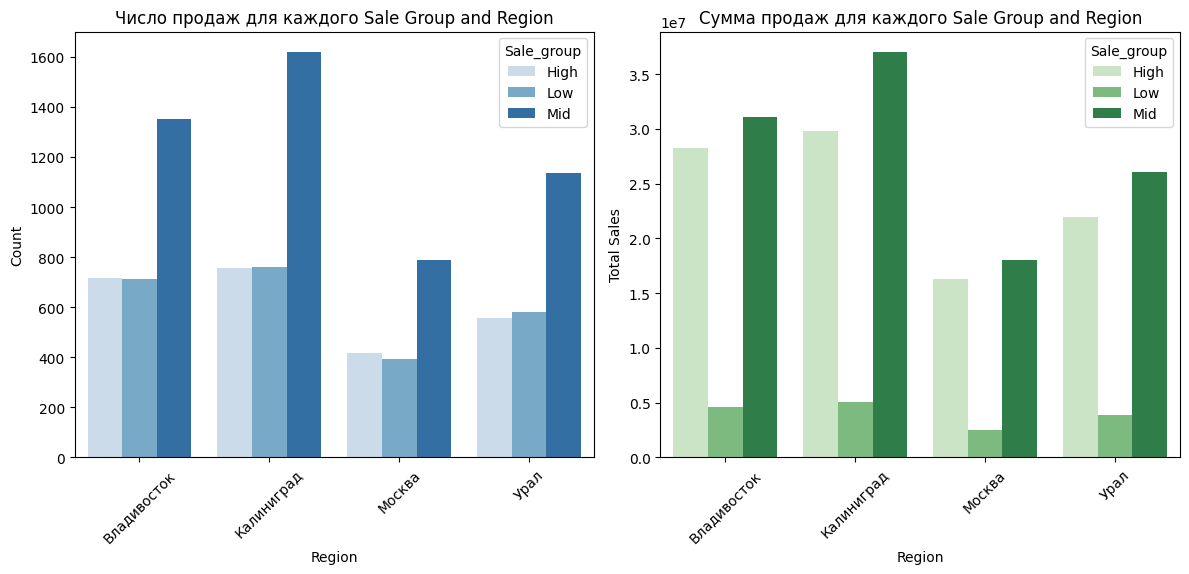

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.barplot(x='Region', y='count', hue='Sale_group', data=tmp, palette='Blues', ax=ax[0])
ax[0].set_title('Число продаж для каждого Sale Group and Region')
ax[0].set_ylabel('Count')
ax[0].set_xlabel('Region')
ax[0].tick_params(axis='x', rotation=45)

sns.barplot(x='Region', y='total_sales', hue='Sale_group', data=tmp, palette='Greens', ax=ax[1])
ax[1].set_title('Сумма продаж для каждого Sale Group and Region')
ax[1].set_ylabel('Total Sales')
ax[1].set_xlabel('Region')
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


Продажи среднего ценового диапазона наиболее частые во всех регионах. Также они образуют самую большую сумму продаж. Продажи высокого ценового диапазона во всех регионах уступают по частоте среднему диапазону, но соизмеримо прибыльные (особенно в Москве и Владивостоке)

In [21]:
df.drop(columns='Sale_group', inplace=True)

### если группировать не обязательно на основе атрибута Sales

In [22]:
df['Sale_group'] = df['Order Date'].dt.year

In [23]:
tmp_stats = df.groupby(['Region', 'Sale_group']).agg(
    count=('Sale_group', 'size'),
    total_sales=('Sales', 'sum')
).reset_index()

tmp_stats = tmp_stats.sort_values(['Region', 'Sale_group'])
tmp_stats['sales_growth'] = tmp_stats.groupby('Region')['total_sales'].pct_change() * 100

tmp_stats.set_index(['Region', 'Sale_group'])

count   total_sales  sales_growth
Region      Sale_group                                   
Владивосток 2015          506  1.166923e+07           NaN
            2016          626  1.445202e+07     23.847201
            2017          745  1.695027e+07     17.286552
            2018          908  2.088117e+07     23.190767
Калиниград  2015          648  1.491591e+07           NaN
            2016          625  1.417588e+07     -4.961307
            2017          787  1.817820e+07     28.233271
            2018         1080  2.466031e+07     35.658682
Москва      2015          344  8.005186e+06           NaN
            2016          330  7.685519e+06     -3.993246
            2017          411  9.606454e+06     24.994215
            2018          513  1.159449e+07     20.694821
Урал        2015          455  1.015968e+07           NaN
            2016          474  1.030136e+07      1.394575
            2017          591  1.405210e+07     36.410126
            2018          757  1.734544e+07     23.436596

In [24]:
df.groupby('Sale_group')['Sales'].sum()

,Sales
Sale_group,
2015,4.475001e+07
2016,4.661478e+07
2017,5.878703e+07
2018,7.448141e+07


Во Владивостоке и на Урале число продаж и общая сумма продаж растет из года в год. В Калининграде и Москве в 2016 число продаж и сумма продаж упали по сравнению с 2015, далее наблюдается рост.  
В целом, группа 2018 года наиболее прибыльная.

In [25]:
df.drop(columns='Sale_group', inplace=True)